This Assigment Consist of a basic neural network which convets Celsius into Fahrenheit. Below down is the exact formula used.
# f=c×1.8+32




In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [0]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [31]:
celsius = np.array([-40, -10,  0,  8, 15, 22,  38], dtype = float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100], dtype = float)
for i,c in enumerate(celsius):
  print("{} Degree Celsius = {} Degree Fahrenheit".format(c,fahrenheit[i]))

-40.0 Degree Celsius = -40.0 Degree Fahrenheit
-10.0 Degree Celsius = 14.0 Degree Fahrenheit
0.0 Degree Celsius = 32.0 Degree Fahrenheit
8.0 Degree Celsius = 46.0 Degree Fahrenheit
15.0 Degree Celsius = 59.0 Degree Fahrenheit
22.0 Degree Celsius = 72.0 Degree Fahrenheit
38.0 Degree Celsius = 100.0 Degree Fahrenheit


# Building the Model

* input_shape=[1] — This specifies that the input to this layer is a single 
value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

* units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

* The below two initialisation of layer and model building could be done simuntaneously:

model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

In [0]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

In [0]:
#Assembling of Layers
#The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.
model = tf.keras.Sequential([l0])

###Compile the model, with loss and optimizer functions
* Loss function — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

* Optimizer function — A way of adjusting internal values in order to reduce the loss.

* These are used during training (model.fit(), below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

* During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

In [0]:
#Compiling the Model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [52]:
# The fit method returns a history object which is used below to visualize the error rate.
result = model.fit(celcius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


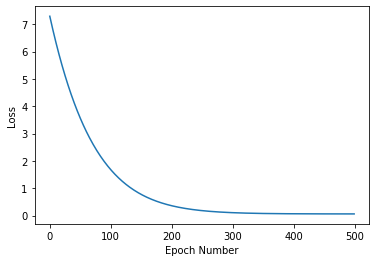

In [54]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(result.history["loss"])

In [55]:
print(model.predict([100.0]))

[[211.74374]]


In [56]:
print("These are the layers variables: {}".format(l0.get_weights()))

These are the layers variables: [array([[1.7981567]], dtype=float32), array([31.928078], dtype=float32)]


### Adding some more dense layers

In [59]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model1 = tf.keras.Sequential([l0, l1, l2])
model1.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
result1 = model1.fit(celsius, fahrenheit, epochs=500, verbose=False)
print("Finished training the model")
print(model1.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74745]]
Model predicts that 100 degrees Celsius is: [[211.74374]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.6734021 , -0.4211348 ,  0.16474557, -0.20594513]],
      dtype=float32), array([ 3.8857532, -4.0474534,  3.6788335, -2.3781576], dtype=float32)]
These are the l1 variables: [array([[ 0.31115863,  0.04537283, -0.94599134, -0.34184712],
       [ 0.21124919,  0.58851355, -0.11471234,  1.2422497 ],
       [ 0.90612805,  0.43769696,  0.1376127 , -1.0458219 ],
       [ 1.2414374 , -0.17634945,  0.27826956,  0.48181075]],
      dtype=float32), array([ 2.5186493,  2.6319838, -3.6926558, -3.8532028], dtype=float32)]
These are the l2 variables: [array([[ 0.56439155],
       [ 0.323704  ],
       [-0.6730306 ],
       [-1.3715246 ]], dtype=float32), array([3.718748], dtype=float32)]


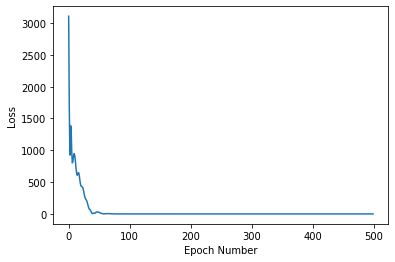

In [60]:
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(result1.history["loss"])